In [138]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
labels = {
    'dqn_RLSVI_mountaincar|dims[50, 50]' : 'Vanilla DQN',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var10.0|dims[25, 25]' : 'Incremental GRLSVI DQN 25/25 - Low Variance, K = 10',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[25, 25]' : 'Incremental GRLSVI DQN 25/25 - High Variance, K = 10',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var10.0|dims[50, 50]' : 'Incremental GRLSVI DQN 50/50 - Low Variance, K = 10',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]' : 'Incremental GRLSVI DQN 50/50 - High Variance, K = 10',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]|k20' : 'Incremental GRLSVI DQN 50/50 - High Variance, K = 20',
    'dqn_RLSVI_mountaincarBRLSVI_K10|noise_var1.0|prior_var100.0|dims[50, 50]' : 'Incremental BRLSVI DQN 50/50, K = 10',
    'dqn_RLSVI_mountaincarBRLSVI_K20|noise_var1.0|prior_var100.0|dims[50, 50]' : 'Incremental BRLSVI DQN 50/50, K = 20',
    'dqn_RLSVI_mountaincar|noise_var0.5|prior_var100.0|dims[50, 50]|k10|sbrlsvi_half' : 'Incremental SBRLSVI DQN 50/50 High Variance, K = 10',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]|k10|SBRLSVIk10' : 'Incremental SBRLSVI DQN 50/50 Low Variance, K = 10',
    'tilecode' : 'Tile Coding'
}

colors = {
    'dqn_RLSVI_mountaincar|dims[50, 50]' : '0.8',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var10.0|dims[25, 25]' : 'g',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[25, 25]' : 'r',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]' : 'c',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]|k20' : 'm',
    'dqn_RLSVI_mountaincarBRLSVI_K10|noise_var1.0|prior_var100.0|dims[50, 50]' : 'y',
    'dqn_RLSVI_mountaincarBRLSVI_K20|noise_var1.0|prior_var100.0|dims[50, 50]' : 'k',
    'dqn_RLSVI_mountaincar|noise_var0.5|prior_var100.0|dims[50, 50]|k10|sbrlsvi_half' : '0.2',
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]|k10|SBRLSVIk10' : '0.4',
    'tilecode' : '0.6'
}
result_files = os.listdir('./results')

In [140]:
files = {}
for label in labels:
    results = list(filter(lambda x: label in x, result_files))
    files[label] = results

In [141]:
def gen_results(filename, average_over=25, num_episodes = 10000, average = True):
    results = []
    for file in files[filename]:
        rewards = np.load(f'./results/{file}')
        moving_average = np.zeros(rewards.shape)
        scale = 1./average_over
        moving_average[0] = rewards[0]
        for i in range(1, rewards.shape[0]):
            moving_average[i] = (1-scale) * moving_average[i-1] + scale * rewards[i]
        results += [moving_average]
    results = np.vstack(results)
    if average:
        results = np.mean(results, axis = 0)
    return np.arange(mean_reward.shape[0]) + 1, results

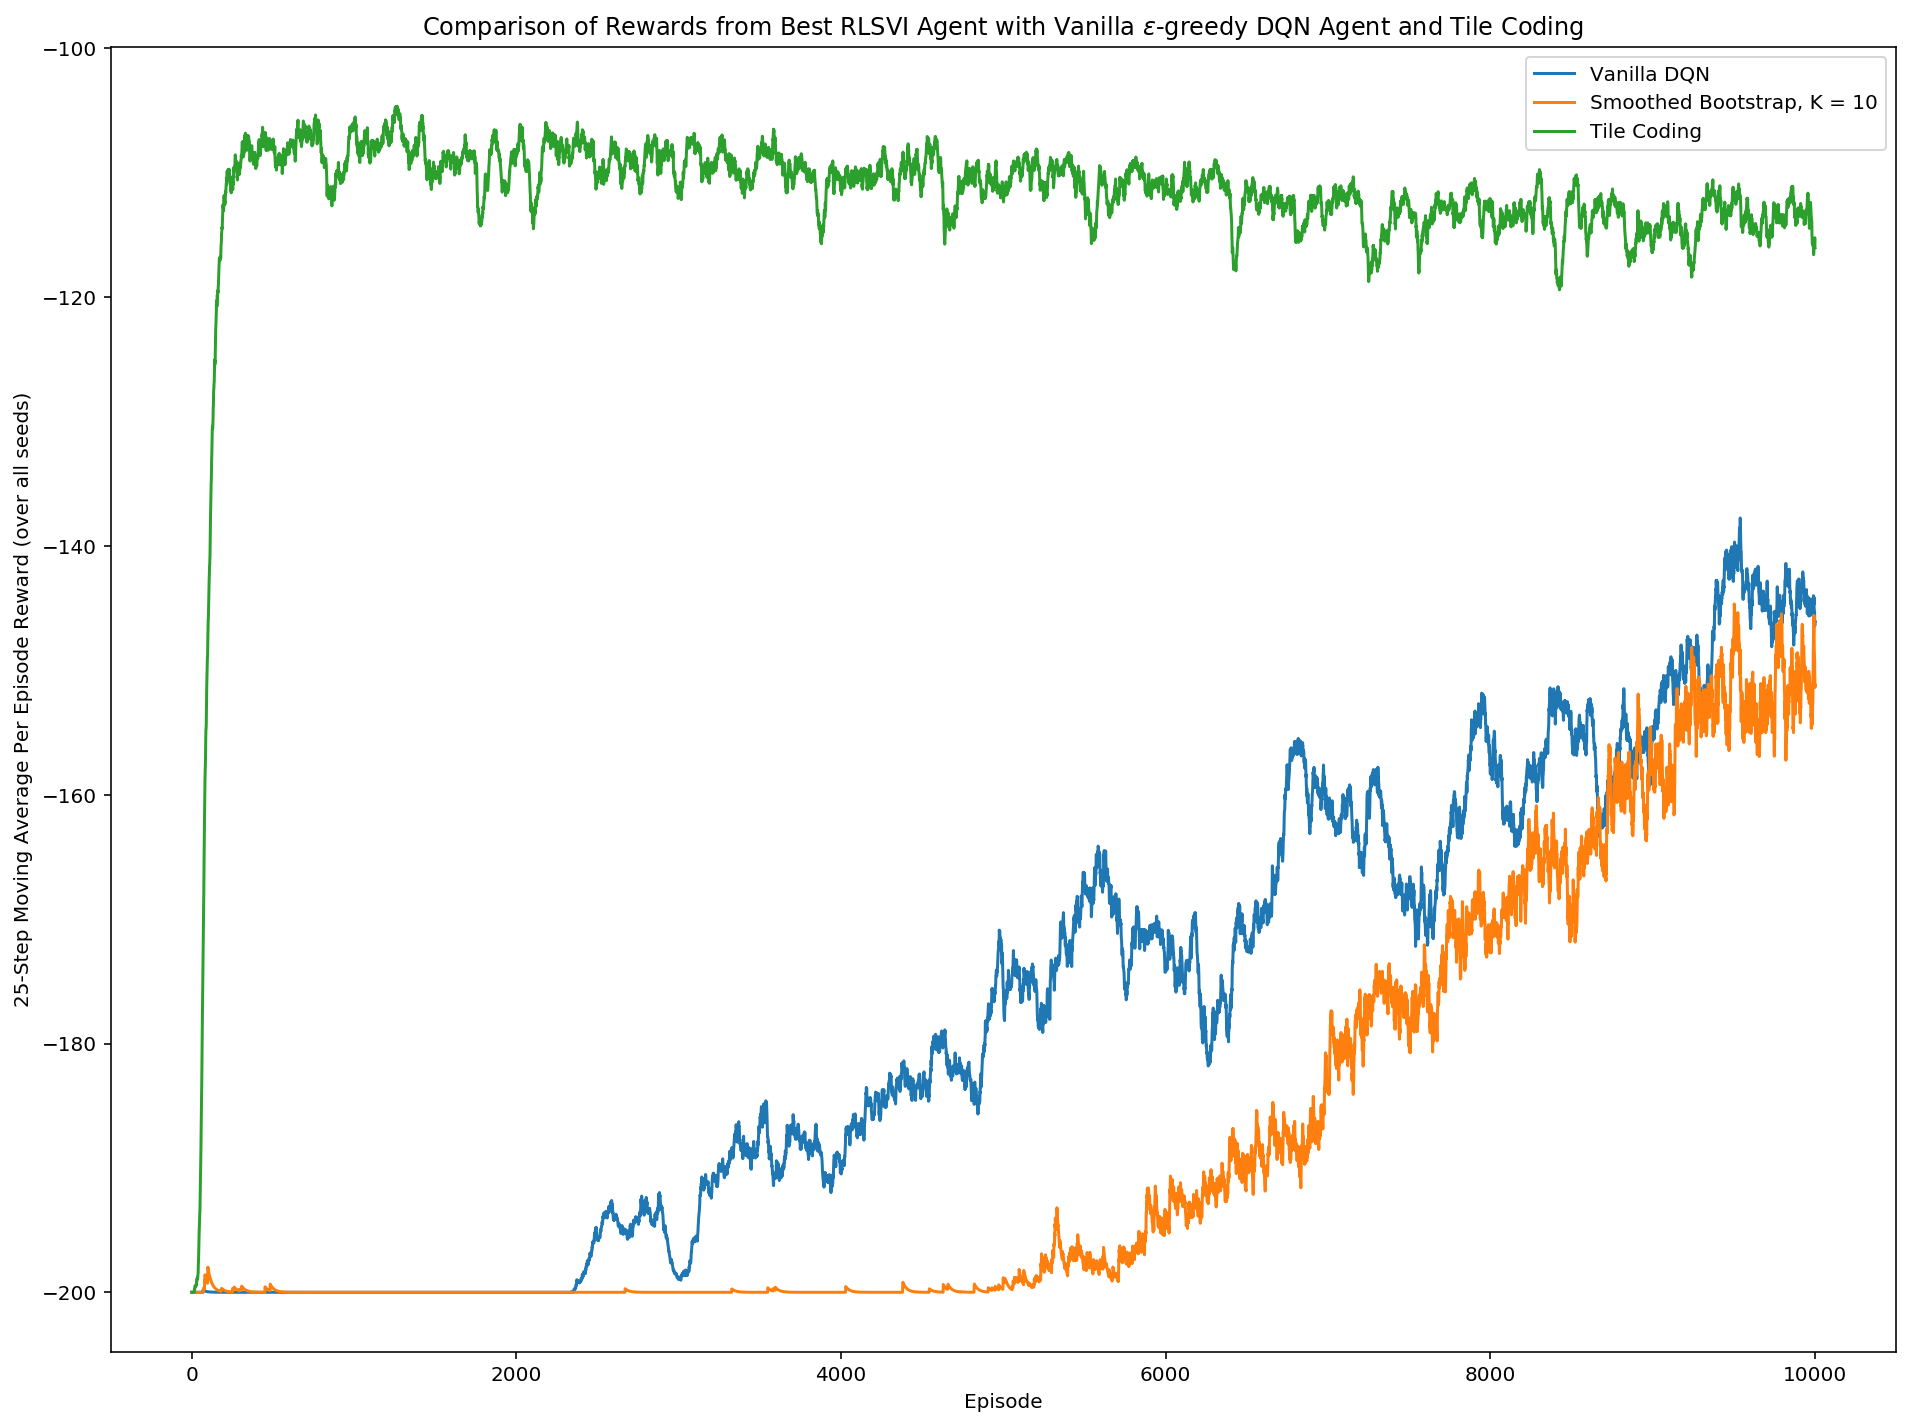

In [142]:
plt.figure(figsize=(16, 12))
labels['dqn_RLSVI_mountaincar|noise_var0.5|prior_var100.0|dims[50, 50]|k10|sbrlsvi_half'] = 'Smoothed Bootstrap, K = 10'
for filename in ['dqn_RLSVI_mountaincar|dims[50, 50]', \
                 'dqn_RLSVI_mountaincar|noise_var0.5|prior_var100.0|dims[50, 50]|k10|sbrlsvi_half', 'tilecode']:
    plt.plot(*gen_results(filename), label=labels[filename])#, color = colors[filename])
plt.xlabel('Episode')
plt.ylabel('25-Step Moving Average Per Episode Reward (over all seeds)')
plt.legend()
plt.title('Comparison of Rewards from Best RLSVI Agent with Vanilla $\epsilon$-greedy DQN Agent and Tile Coding')
plt.savefig('rlsvi_dqn_tilecoding_MA')
plt.show()

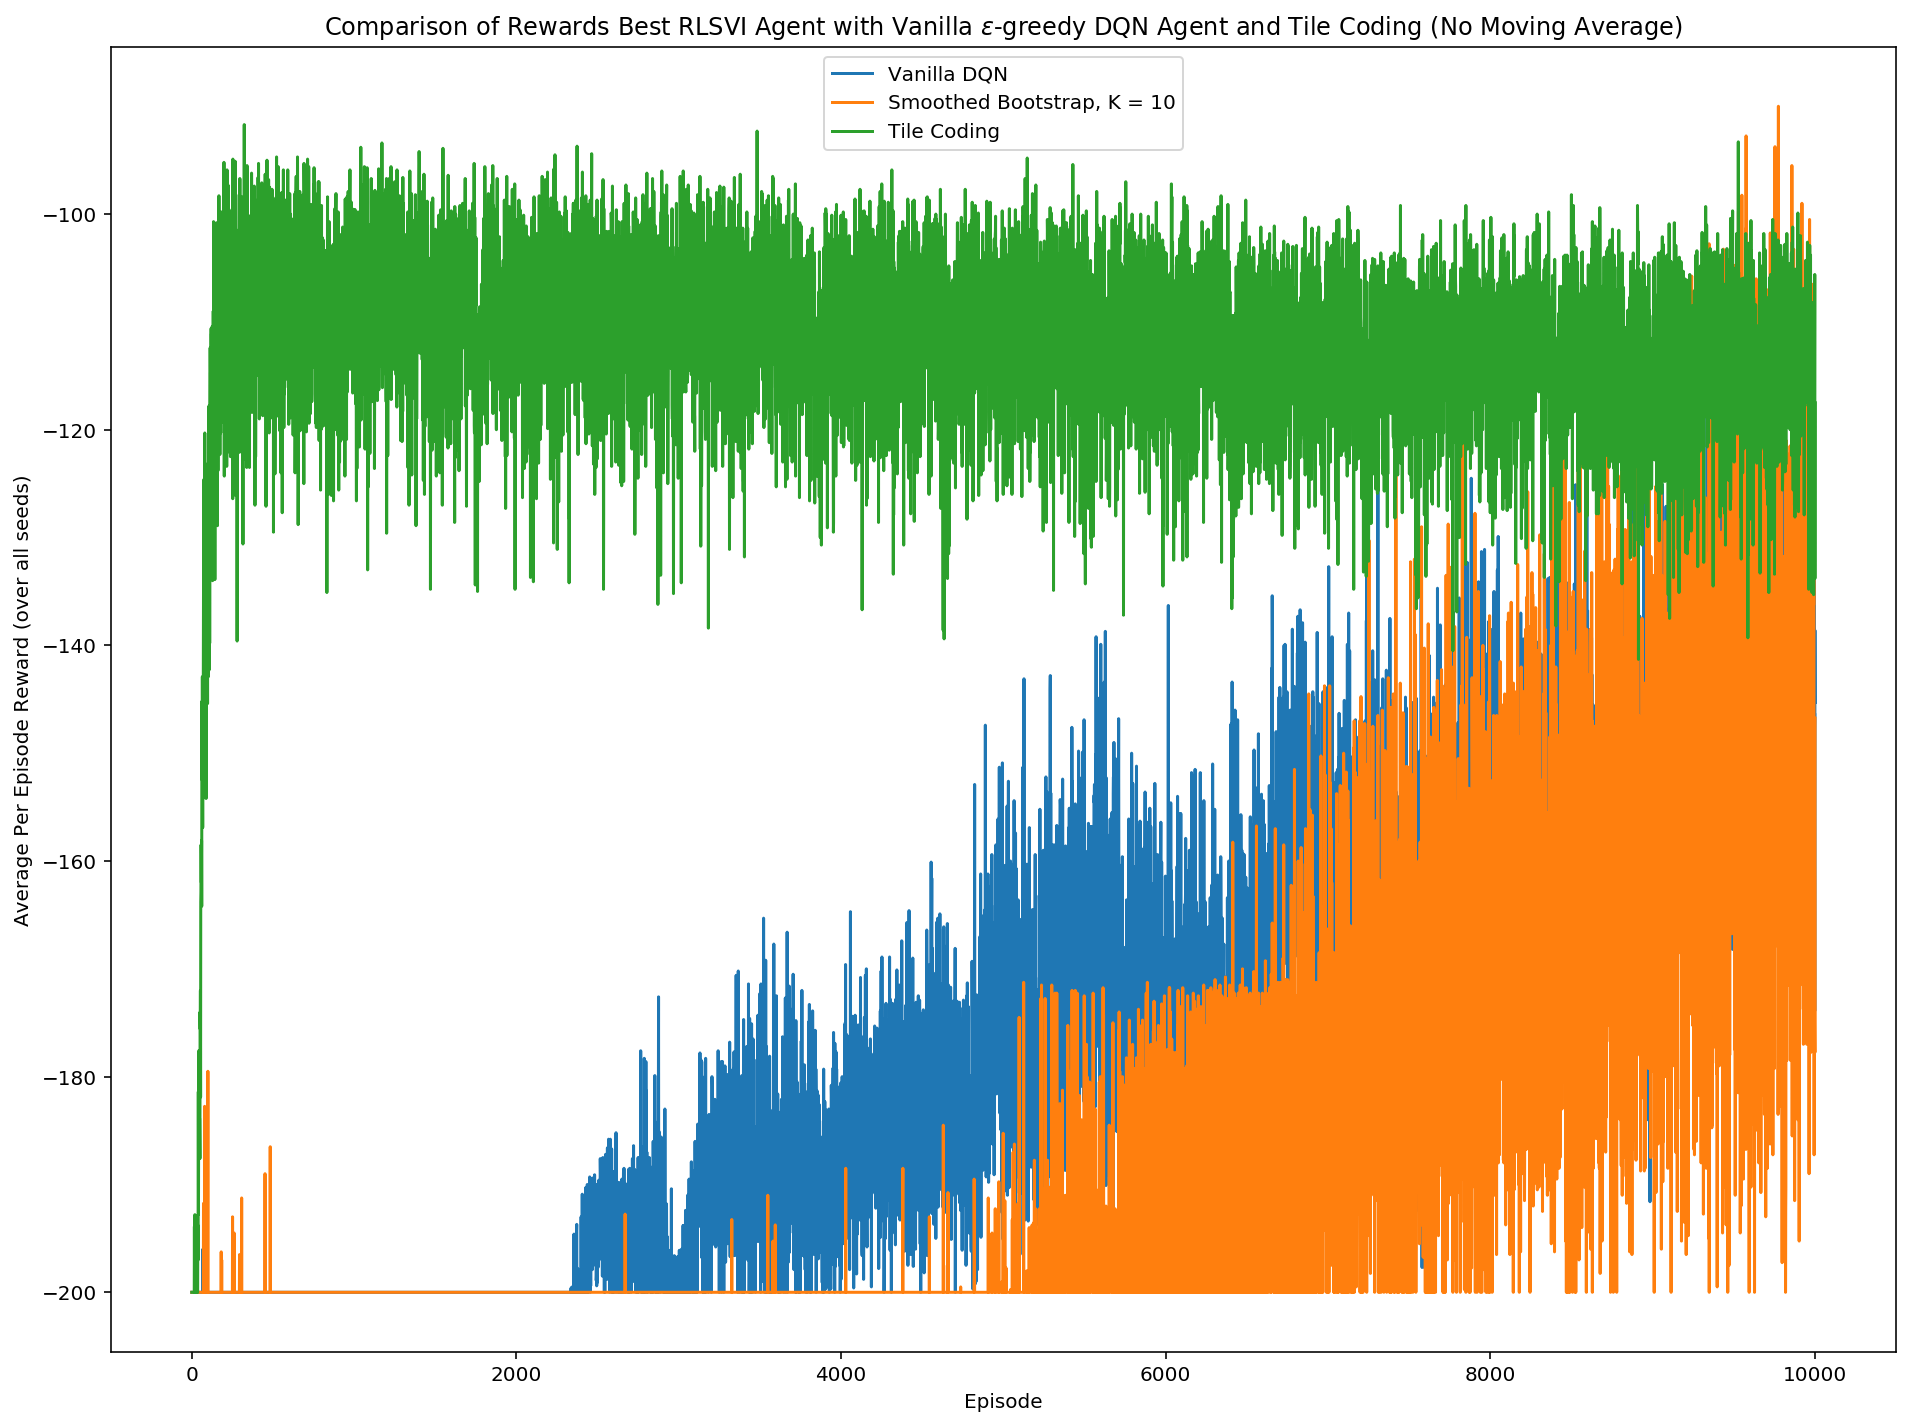

In [143]:
plt.figure(figsize=(16, 12))
for filename in ['dqn_RLSVI_mountaincar|dims[50, 50]', \
                 'dqn_RLSVI_mountaincar|noise_var0.5|prior_var100.0|dims[50, 50]|k10|sbrlsvi_half', 'tilecode']:
    plt.plot(*gen_results(filename, average_over = 1), label=labels[filename])#, color = colors[filename])
plt.xlabel('Episode')
plt.ylabel('Average Per Episode Reward (over all seeds)')
plt.legend()
plt.title('Comparison of Rewards Best RLSVI Agent with Vanilla $\epsilon$-greedy DQN Agent and Tile Coding (No Moving Average)')
plt.savefig('rlsvi_dqn_tile_coding')
plt.show()

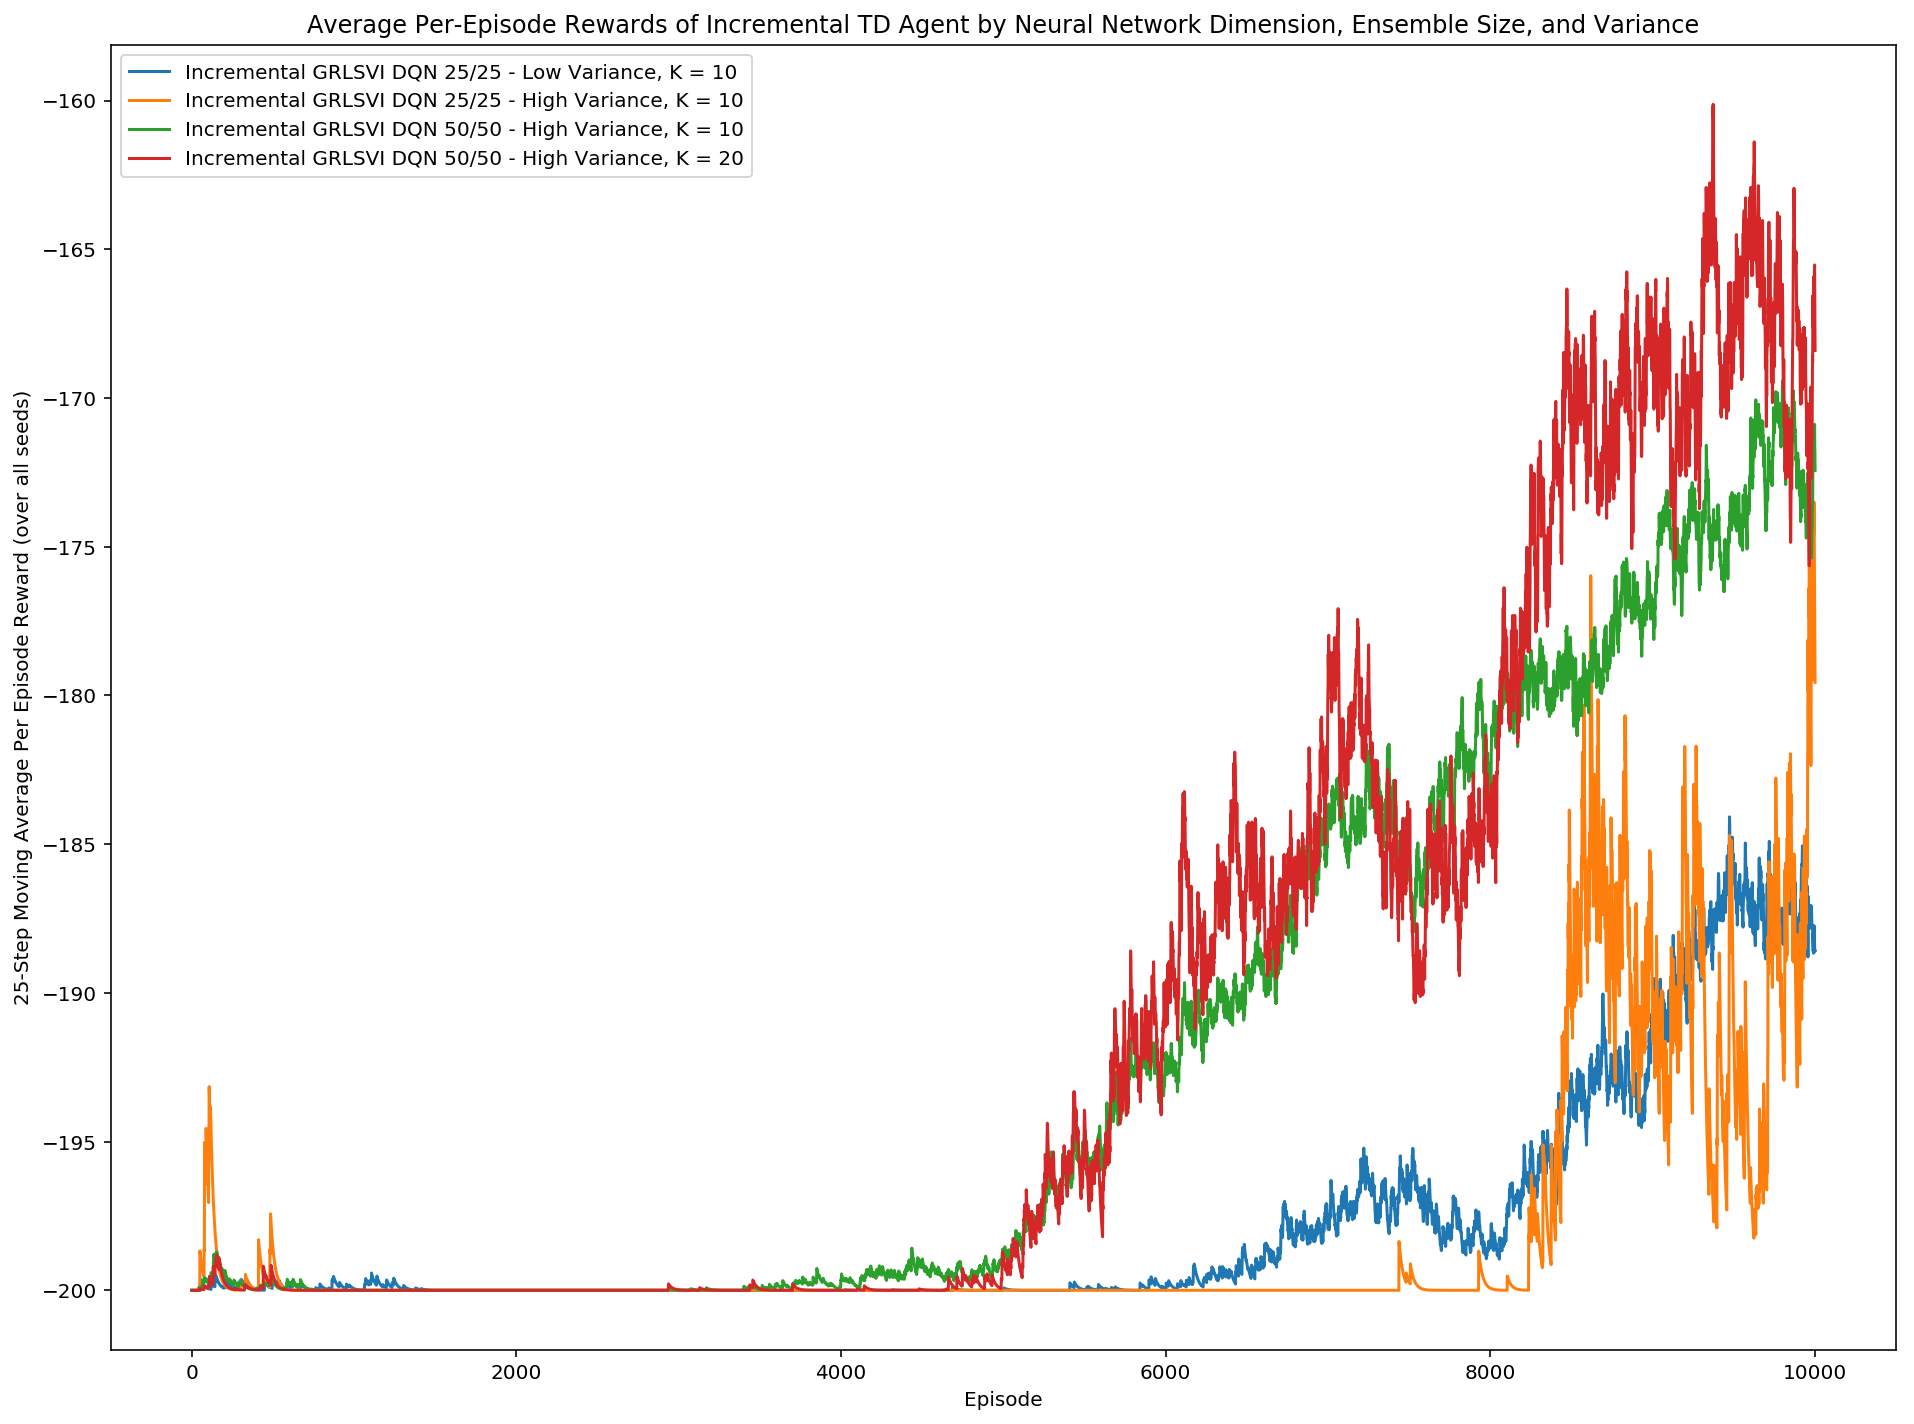

In [144]:
plt.figure(figsize=(16, 12))
for filename in ['dqn_RLSVI_mountaincar|noise_var1.0|prior_var10.0|dims[25, 25]', \
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[25, 25]', \
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]', \
    'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]|k20']:
    plt.plot(*gen_results(filename), label=labels[filename])#, color = colors[filename])
plt.xlabel('Episode')
plt.ylabel('Average Per Episode Reward (over all seeds)')
plt.ylabel('25-Step Moving Average Per Episode Reward (over all seeds)')
plt.legend()
plt.title('Average Per-Episode Rewards of Incremental TD Agent by Neural Network Dimension, Ensemble Size, and Variance')
plt.savefig('grlsvi_MA')
plt.show()

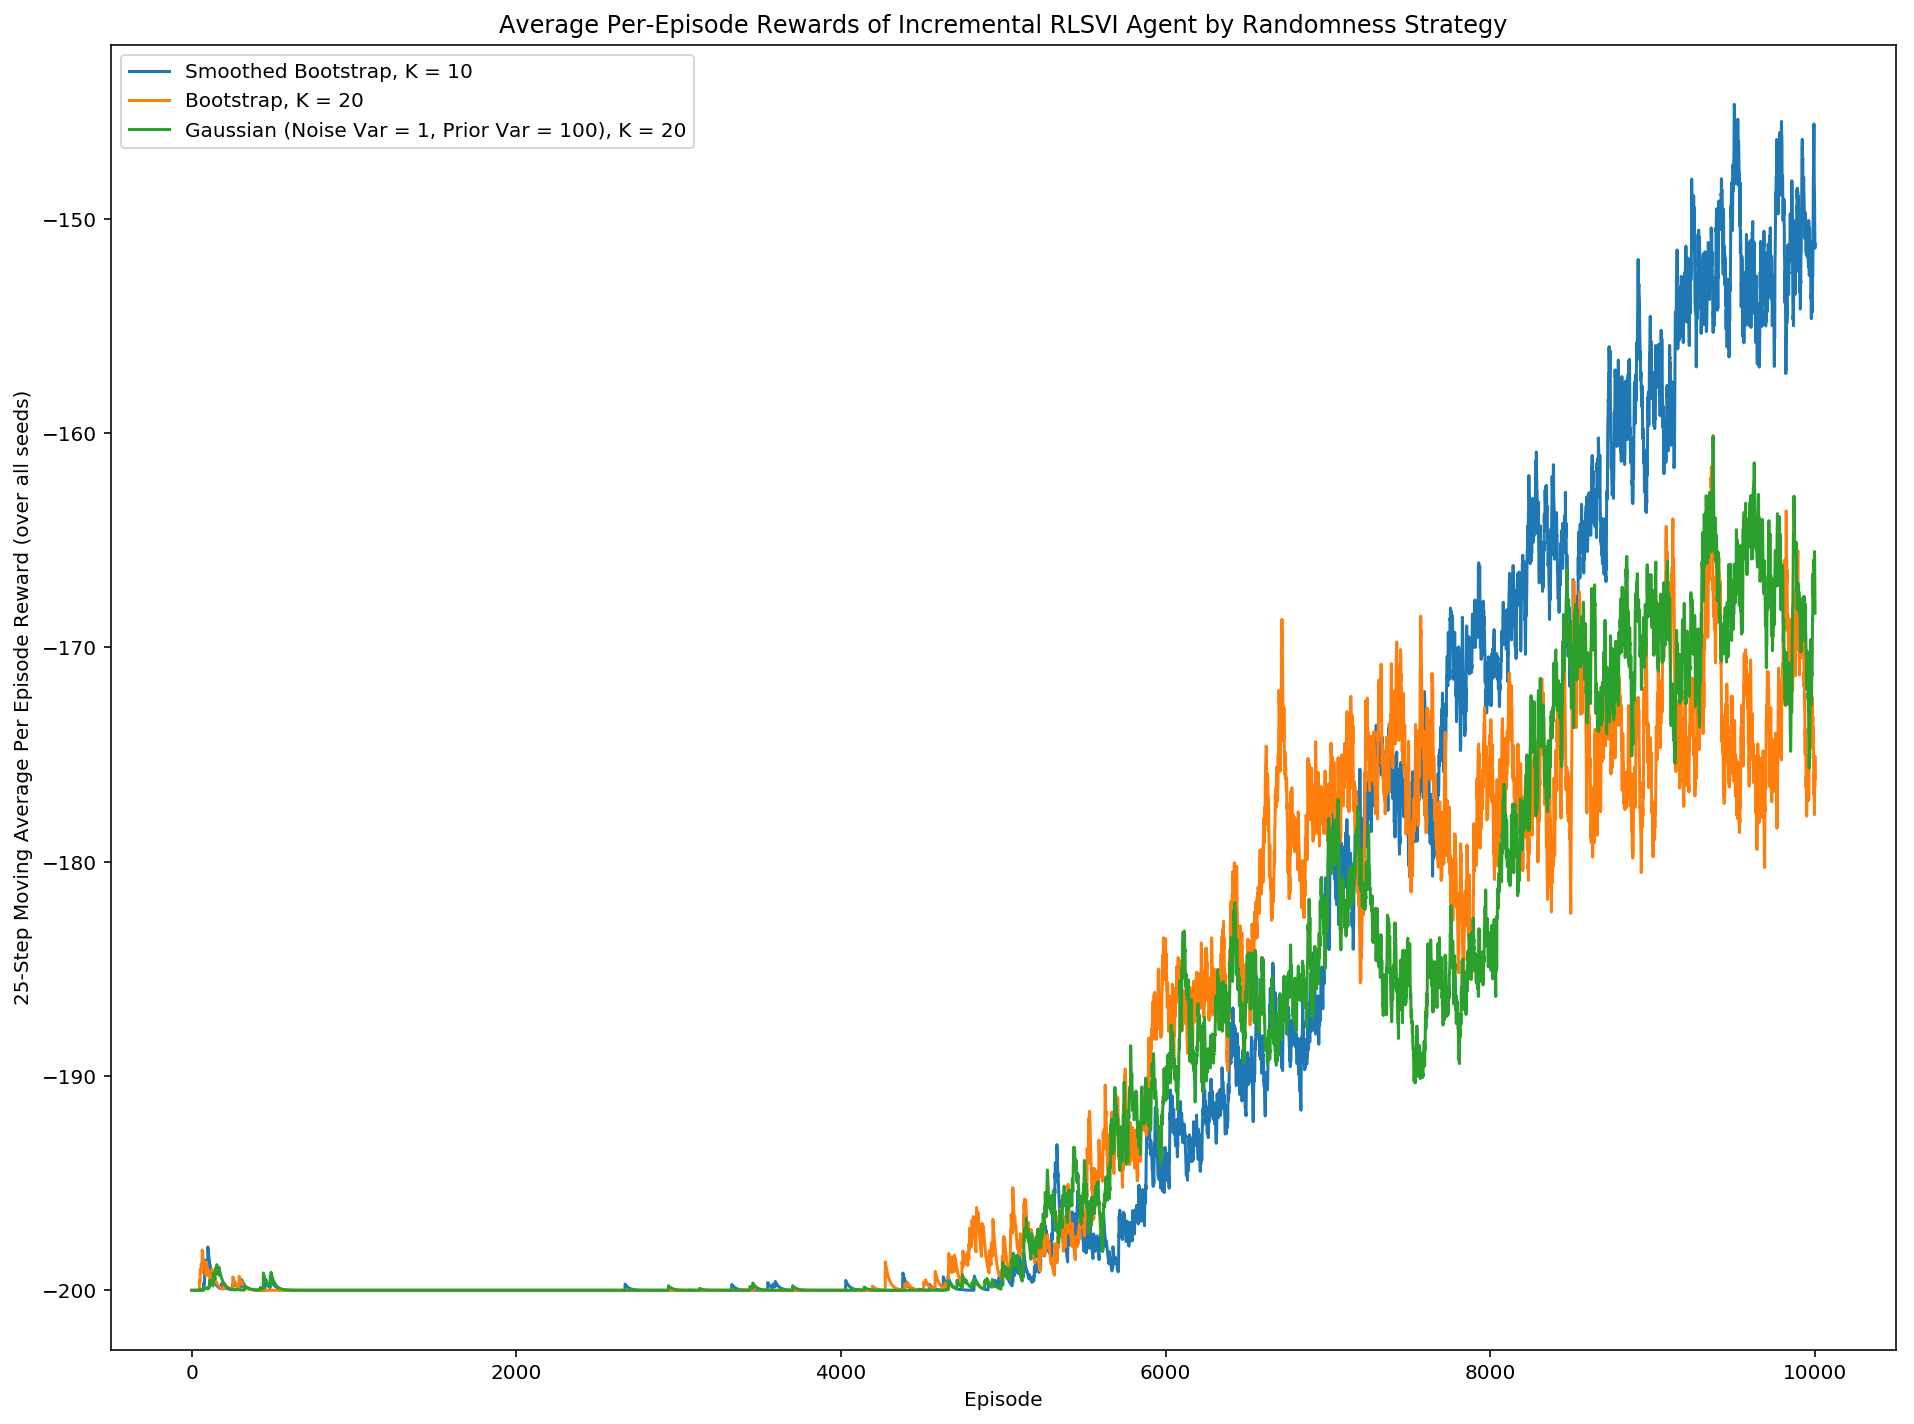

In [148]:
plt.figure(figsize=(16, 12))
labels = {'dqn_RLSVI_mountaincar|noise_var0.5|prior_var100.0|dims[50, 50]|k10|sbrlsvi_half' : 'Smoothed Bootstrap, K = 10', \
                 'dqn_RLSVI_mountaincarBRLSVI_K20|noise_var1.0|prior_var100.0|dims[50, 50]' : 'Bootstrap, K = 20', \
                 'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]|k20' : 'Gaussian (Noise Var = 1, Prior Var = 100), K = 20'}

for idx, filename in enumerate(['dqn_RLSVI_mountaincar|noise_var0.5|prior_var100.0|dims[50, 50]|k10|sbrlsvi_half', \
                 'dqn_RLSVI_mountaincarBRLSVI_K20|noise_var1.0|prior_var100.0|dims[50, 50]', \
                 'dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]|k20']):
    plt.plot(*gen_results(filename), label=labels[filename])#, color = str(1-1/(idx + 1)))
plt.xlabel('Episode')
plt.ylabel('25-Step Moving Average Per Episode Reward (over all seeds)')
plt.legend()
plt.title('Average Per-Episode Rewards of Incremental RLSVI Agent by Randomness Strategy')
plt.savefig('g_b_sb_rlsvi_MA')
plt.show()

In [126]:
def gen__single_agent_results(filename, average_over=25, num_episodes = 10000):
    results = []
    for file in files[filename]:
        rewards = np.load(f'./results/{file}')
        moving_average = np.zeros(rewards.shape)
        scale = 1./average_over
        moving_average[0] = rewards[0]
        for i in range(1, rewards.shape[0]):
            moving_average[i] = (1-scale) * moving_average[i-1] + scale * rewards[i]
        results += [moving_average]
    results = np.vstack(results)
    mean_reward = np.mean(results, axis = 0)
    return np.arange(mean_reward.shape[0]) + 1, mean_reward

dqn_RLSVI_mountaincar|dims[50, 50]|9.npy -169.0
dqn_RLSVI_mountaincar|dims[50, 50]|8.npy -109.0
dqn_RLSVI_mountaincar|dims[50, 50]|0.npy -200.0
dqn_RLSVI_mountaincar|dims[50, 50]|1.npy -92.0
dqn_RLSVI_mountaincar|dims[50, 50]|3.npy -200.0
dqn_RLSVI_mountaincar|dims[50, 50]|2.npy -85.0
dqn_RLSVI_mountaincar|dims[50, 50]|6.npy -96.0
dqn_RLSVI_mountaincar|dims[50, 50]|7.npy -102.0
dqn_RLSVI_mountaincar|dims[50, 50]|5.npy -200.0
dqn_RLSVI_mountaincar|dims[50, 50]|4.npy -200.0


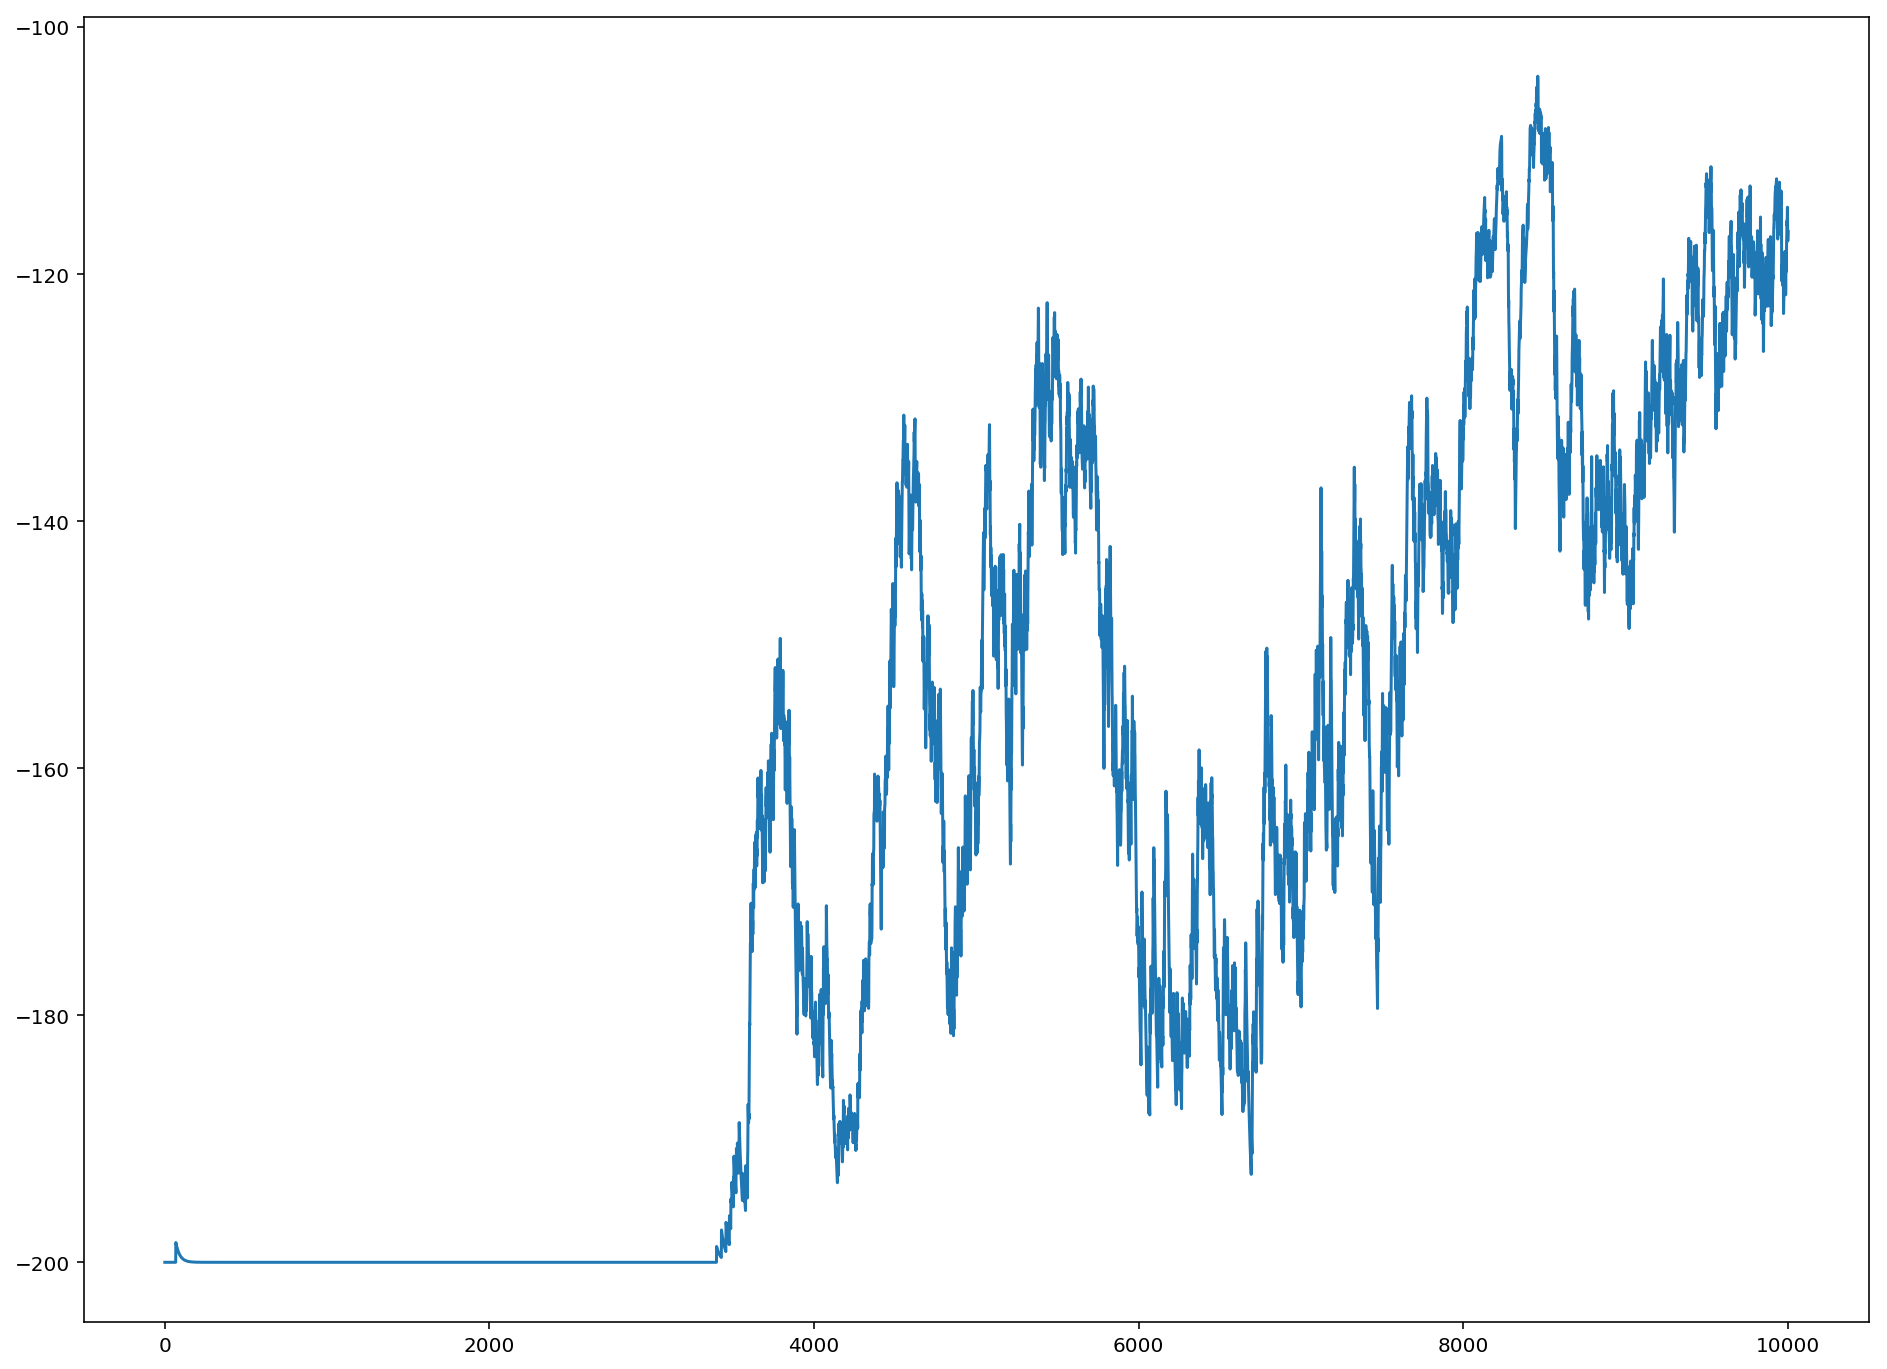

In [147]:
xlabels, results = gen_results('dqn_RLSVI_mountaincar|dims[50, 50]', average=False)
plt.figure(figsize=(16, 12))
for i in range(1, len(results)):
    plt.plot(xlabels, results[i])
    break

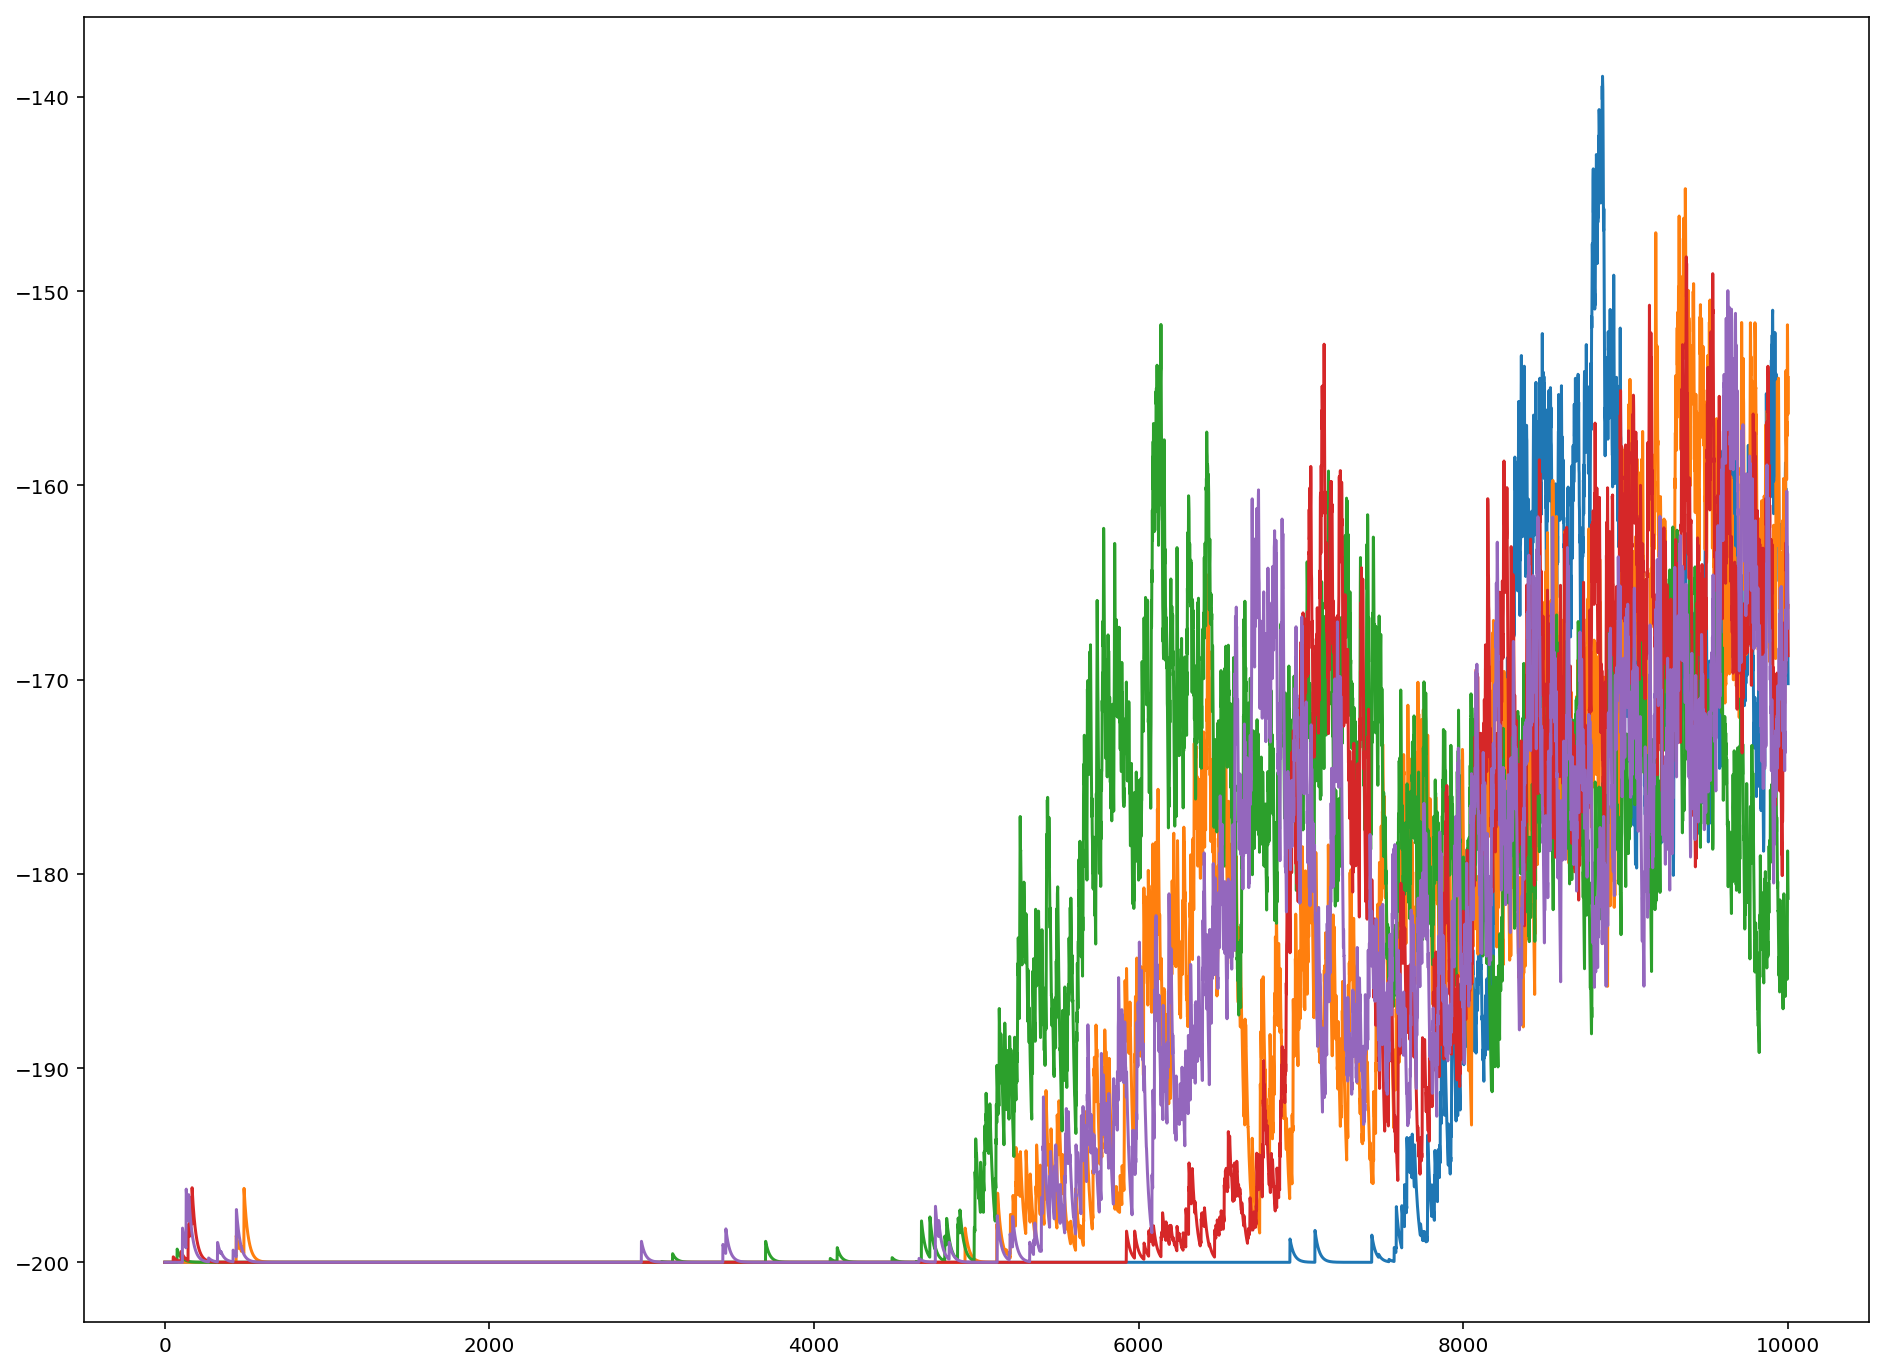

In [137]:
xlabels, results = gen_results('dqn_RLSVI_mountaincar|noise_var1.0|prior_var100.0|dims[50, 50]|k20', average=False)
plt.figure(figsize=(16, 12))
for i in range(len(results)):
    plt.plot(xlabels, results[i])